In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv("Titanic-Dataset.csv")

In [48]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [50]:
data.shape

(891, 12)

### Generate summary statistics (mean, median, std, etc.)

In [51]:
# This gives count, mean, standard deviation, min, 25%, 50% (median), 75%, and max values for each numeric feature.
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Handling missing values

In [52]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
# Fill missing Age with median
data['Age'] = data['Age'].fillna(data['Age'].median())

In [54]:
# Fill missing Embarked with mode
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [58]:
data.drop(columns=['Cabin'], inplace=True)

In [59]:
# Convert 'Sex' and 'Embarked' into numeric values using one-hot encoding
data_encoded = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [60]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Create histograms and boxplots for numeric features.

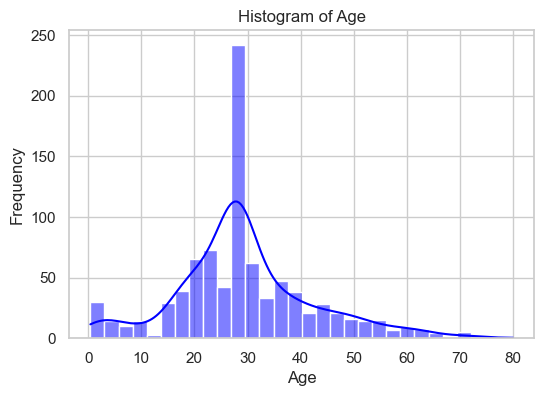

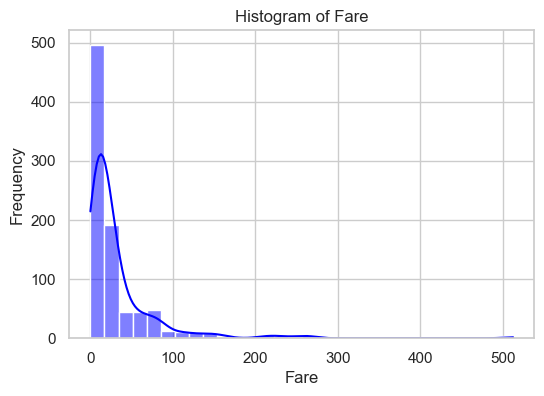

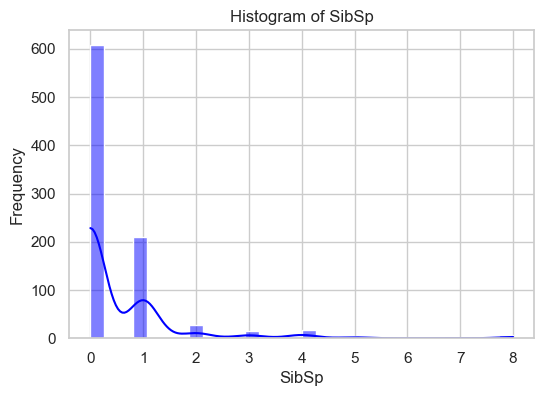

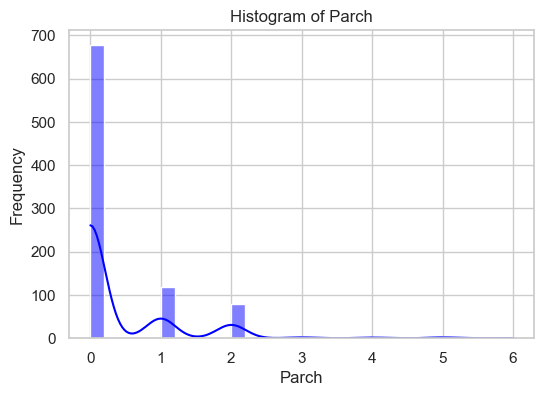

In [91]:
# Set plot style
sns.set(style="whitegrid")

# List of numeric columns
numeric_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Plot histograms
# Histograms show how values are distributed (e.g., Fare is right-skewed).
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data[col], bins=30, kde=True, color='blue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

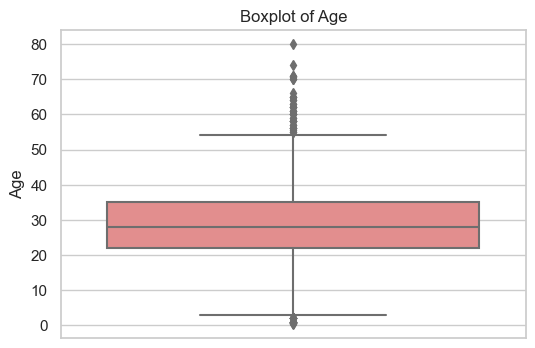

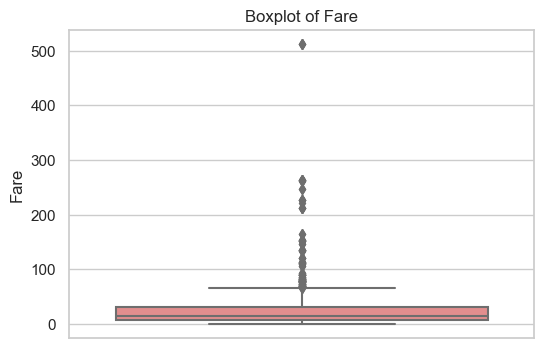

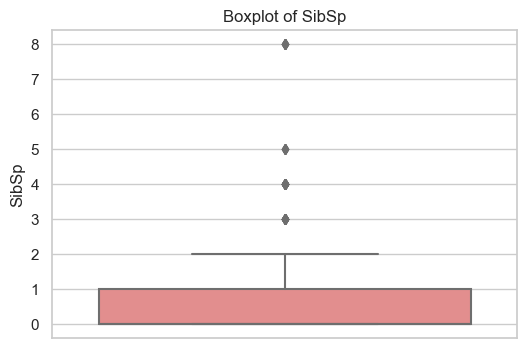

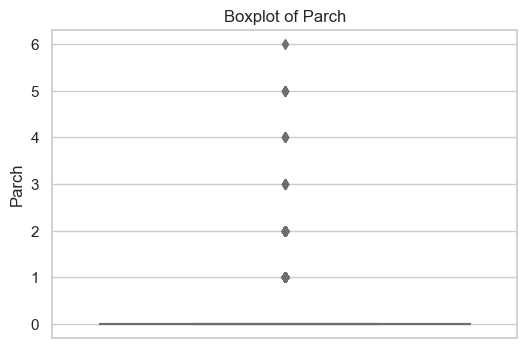

In [68]:
# Plot boxplots
# Boxplots help to spot outliers clearly (e.g., in Age and Fare columns).or col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
    plt.show()

### About Parch column 

In [92]:
# Note:
# 'Parch' has few distinct values and low variation.
# So, the boxplot’s box shrinks or disappears, showing only dots.
# A count plot is better to see its distribution.

print(data['Parch'].value_counts())
print(data['Parch'].describe())

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64
count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64


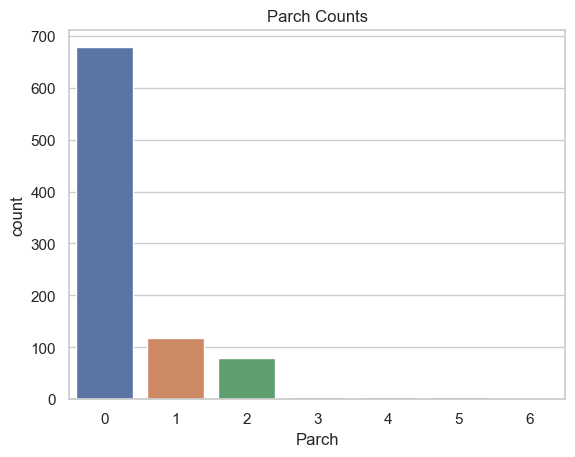

In [93]:
sns.countplot(x='Parch', data=data)
plt.title('Parch Counts')
plt.show()

### Use pairplot/correlation matrix for feature relationships.

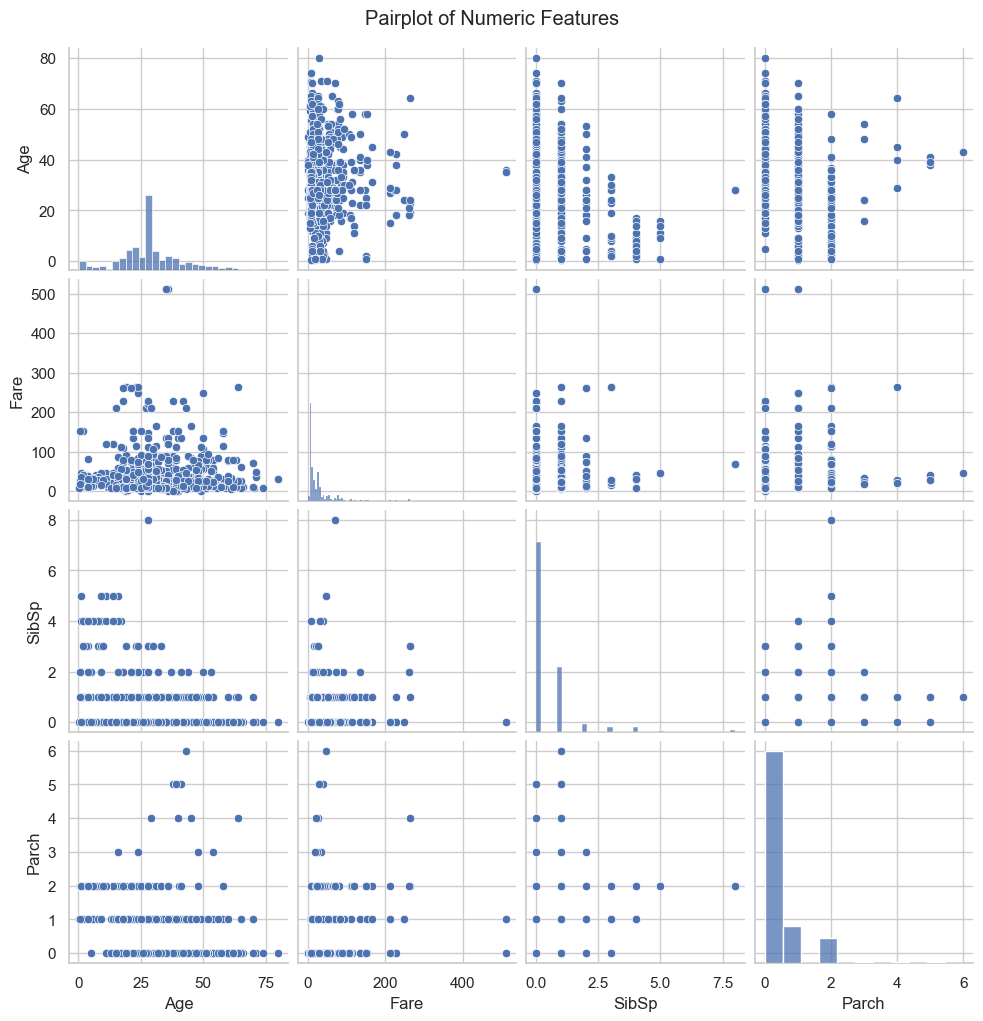

In [71]:
# Pairplot for numeric features
# Pairplot helps us visualize the relationships between all numeric features.
# It's useful to see how features vary with each other and can show patterns or clusters.

sns.pairplot(data[numeric_cols])
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

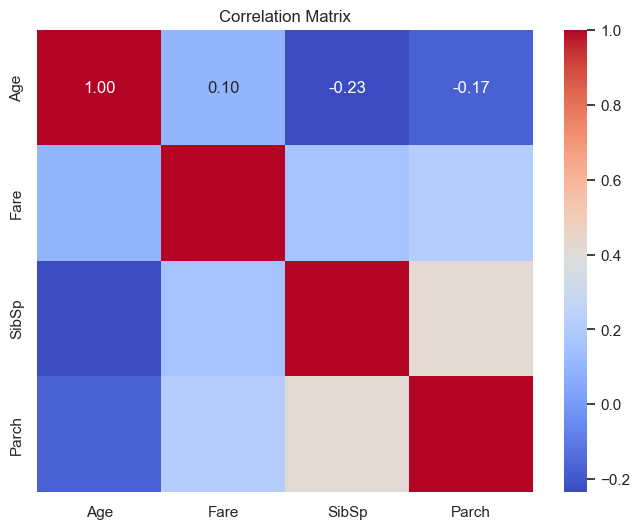

In [72]:
# Correlation matrix heatmap
# Heatmap shows the correlation between numeric features.
# Values close to 1 or -1 mean strong relationships, while values near 0 mean weak or no relationship.

plt.figure(figsize=(8, 6))
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

### Identify patterns, trends, or anomalies in the data.


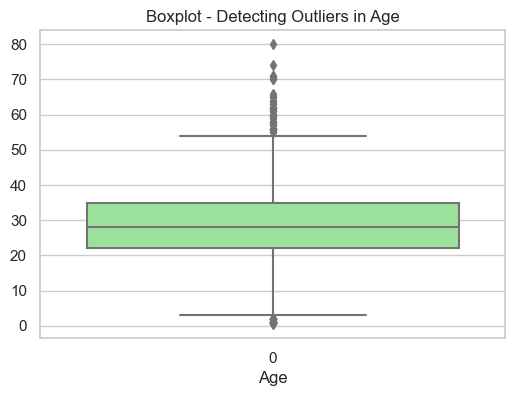

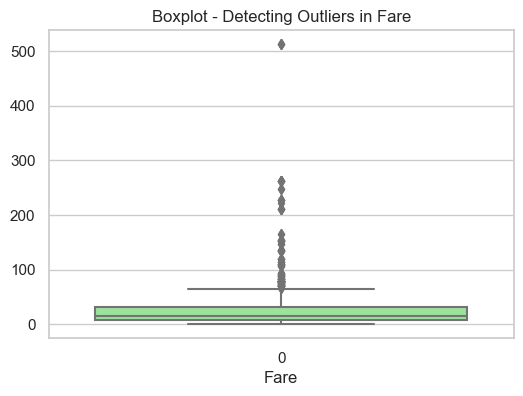

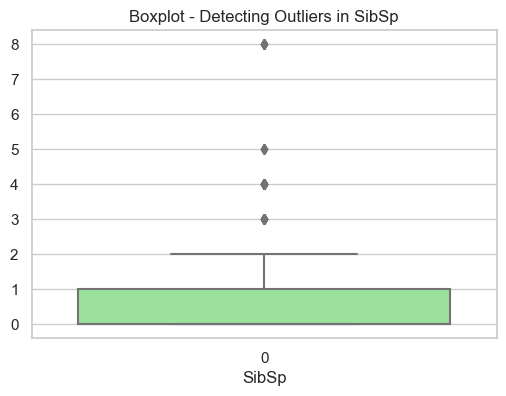

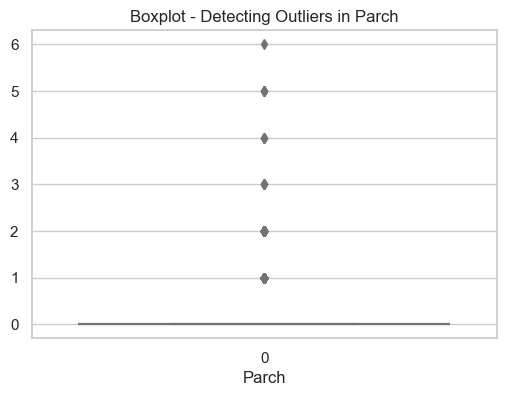

In [86]:
# Boxplots for numeric features to identify outliers visually
numeric_cols = ['Age', 'Fare', 'SibSp','Parch']

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data[col], color='lightgreen')
    plt.title(f'Boxplot - Detecting Outliers in {col}')
    plt.xlabel(col)
    plt.show()

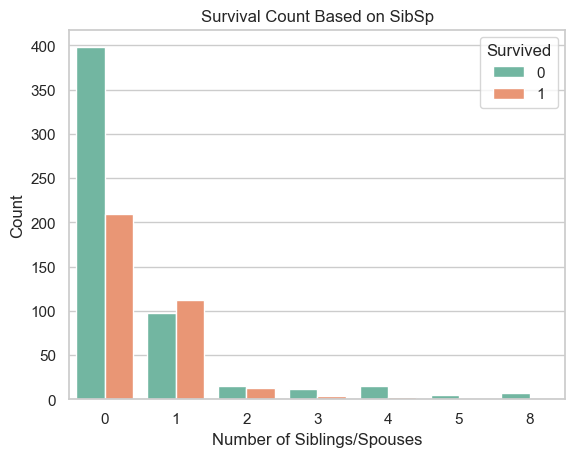

In [87]:
# Trend: Survival vs SibSp (siblings/spouses aboard)
sns.countplot(x='SibSp', hue='Survived', data=data, palette='Set2')
plt.title("Survival Count Based on SibSp")
plt.xlabel("Number of Siblings/Spouses")
plt.ylabel("Count")
plt.show()

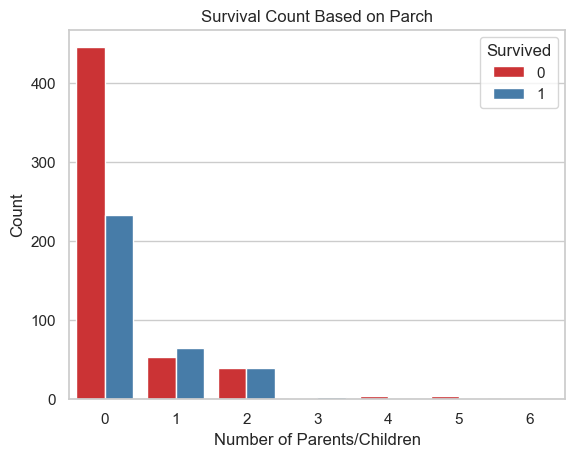

In [88]:
# Trend: Survival vs Parch (parents/children aboard)
sns.countplot(x='Parch', hue='Survived', data=data, palette='Set1')
plt.title("Survival Count Based on Parch")
plt.xlabel("Number of Parents/Children")
plt.ylabel("Count")
plt.show()

### Make basic feature-level inferences from visuals.

Feature-Level Inferences:
Age:
   -> Most passengers are between 20–40 years old.
   -> Outliers exist above 70 years.


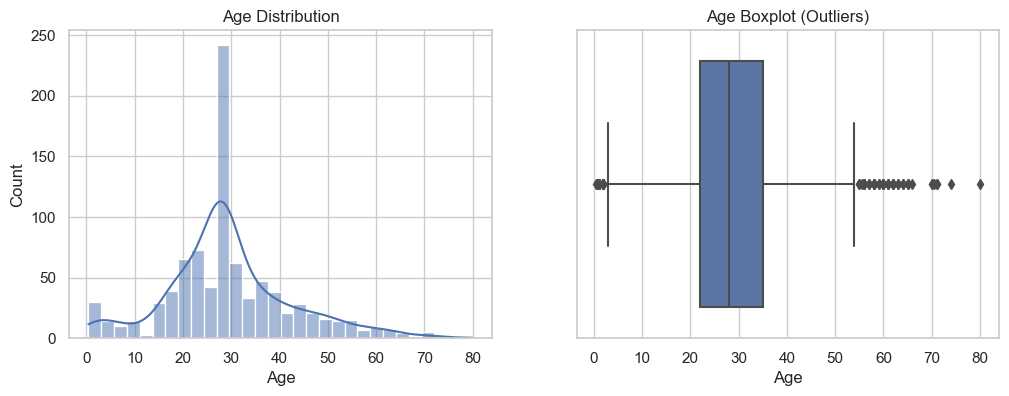

Fare:
   -> Most fares are under 100.
   -> A few passengers paid very high fares (above 300), indicating outliers.


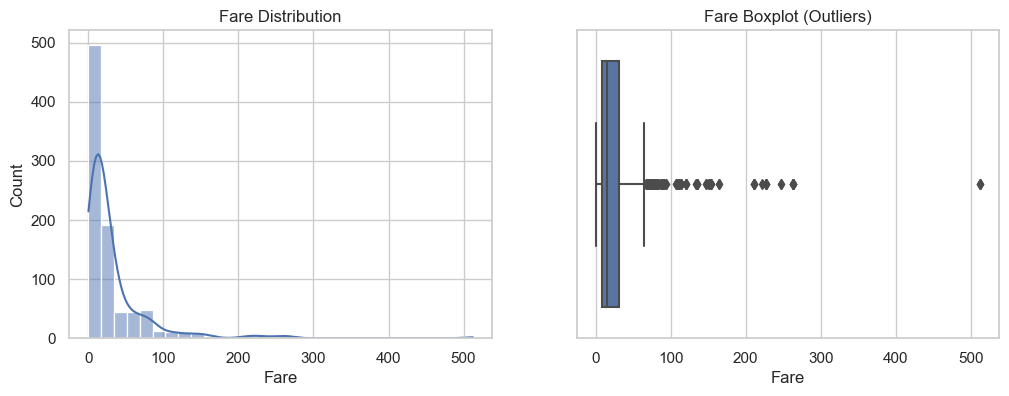

SibSp (Siblings/Spouses Aboard):
   -> Most passengers traveled alone (0) or with 1 family member.
   -> Passengers with 1–2 SibSp had higher survival chances.


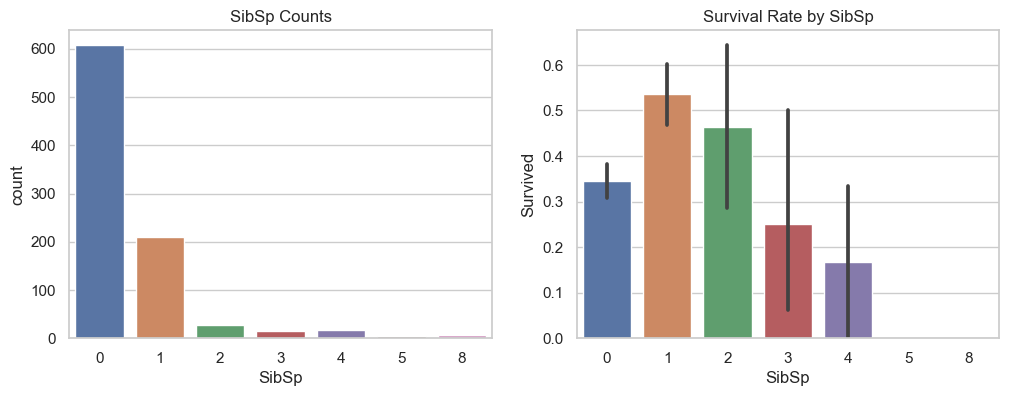

Parch (Parents/Children Aboard):
   -> Most passengers had 0 or 1 Parch.
   -> Small families (Parch = 1–2) had better survival rates.


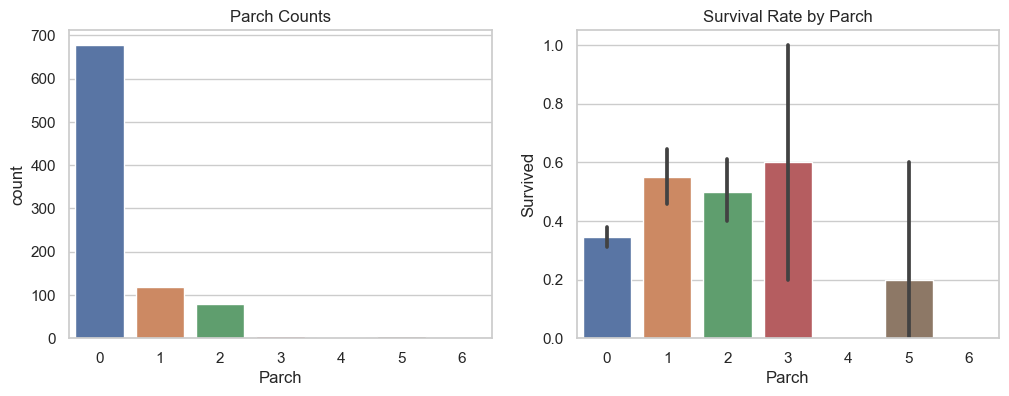

Survival Trends:
   -> Higher fares slightly increase the chance of survival.
   -> Younger passengers and those with small families had better chances.


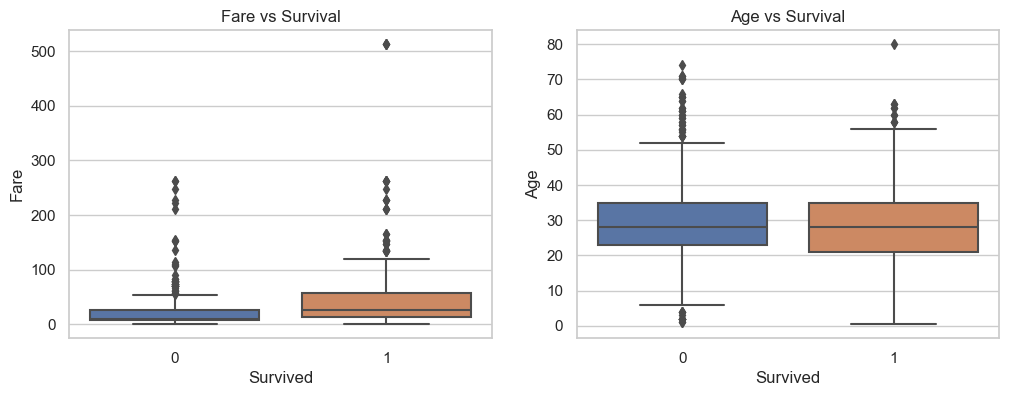

In [89]:
print("Feature-Level Inferences:")

print("Age:")
print("   -> Most passengers are between 20–40 years old.")
print("   -> Outliers exist above 70 years.")

# Visual: Age distribution with histogram and boxplot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data['Age'].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.subplot(1,2,2)
sns.boxplot(x=data['Age'])
plt.title("Age Boxplot (Outliers)")
plt.show()

print("Fare:")
print("   -> Most fares are under 100.")
print("   -> A few passengers paid very high fares (above 300), indicating outliers.")

# Visual: Fare distribution histogram and boxplot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.histplot(data['Fare'], bins=30, kde=True)
plt.title("Fare Distribution")
plt.subplot(1,2,2)
sns.boxplot(x=data['Fare'])
plt.title("Fare Boxplot (Outliers)")
plt.show()

print("SibSp (Siblings/Spouses Aboard):")
print("   -> Most passengers traveled alone (0) or with 1 family member.")
print("   -> Passengers with 1–2 SibSp had higher survival chances.")

# Visual: SibSp count and survival rate bar plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='SibSp', data=data)
plt.title("SibSp Counts")
plt.subplot(1,2,2)
sns.barplot(x='SibSp', y='Survived', data=data)
plt.title("Survival Rate by SibSp")
plt.show()

print("Parch (Parents/Children Aboard):")
print("   -> Most passengers had 0 or 1 Parch.")
print("   -> Small families (Parch = 1–2) had better survival rates.")

# Visual: Parch count and survival rate bar plot
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x='Parch', data=data)
plt.title("Parch Counts")
plt.subplot(1,2,2)
sns.barplot(x='Parch', y='Survived', data=data)
plt.title("Survival Rate by Parch")
plt.show()

print("Survival Trends:")
print("   -> Higher fares slightly increase the chance of survival.")
print("   -> Younger passengers and those with small families had better chances.")

# Visual: Fare vs Survival and Age vs Survival scatterplots
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='Survived', y='Fare', data=data)
plt.title("Fare vs Survival")
plt.subplot(1,2,2)
sns.boxplot(x='Survived', y='Age', data=data)
plt.title("Age vs Survival")
plt.show()